Información del DataFrame (sin columnas ignoradas):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Columns: 150 entries, gidenpac to ds_ulcera_presion
dtypes: category(143), int64(7)
memory usage: 48.1 KB

Estadísticas descriptivas:
          ds_edad  ds_estancia  ds_pre_oper  ds_post_oper  ds_vivo_alta  \
count  115.000000   115.000000   115.000000    115.000000    115.000000   
mean    93.252174    14.104348     3.921739     10.182609      0.947826   
std      5.659712     7.739593     3.003354      6.691947      0.223351   
min     80.000000     5.000000     1.000000      4.000000      0.000000   
25%     89.000000    10.000000     2.000000      7.000000      1.000000   
50%     94.000000    12.000000     3.000000      8.000000      1.000000   
75%     97.000000    15.000000     5.000000     11.000000      1.000000   
max    105.000000    59.000000    20.000000     54.000000      1.000000   

          Barthel      braden  
count  115.000000  115.000000  
me

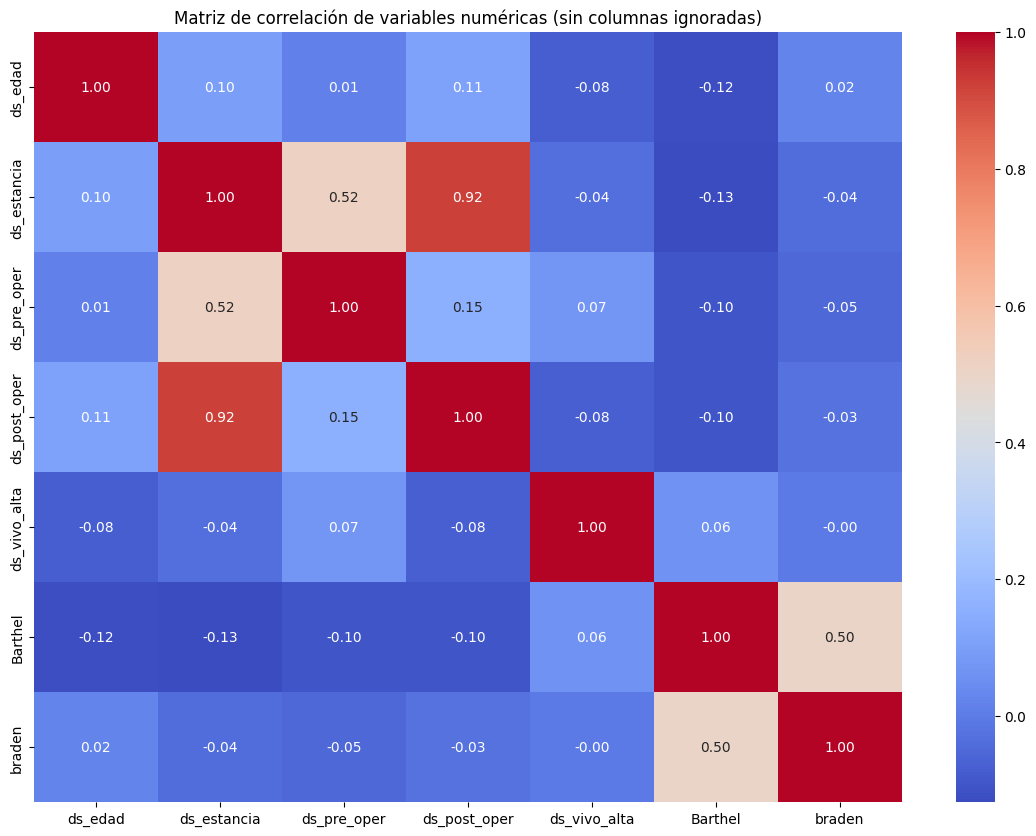

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset preprocesado
df = pd.read_csv('/home/ubuntu/STG-fractura_cadera/2025_02/models/PREPROCESADO_3/DATOS_PRPROCESADOS_3_2022-2024.csv')

# Eliminar filas que contengan "-999" o -999 en cualquier columna
df = df[~df.isin(["-999", -999]).any(axis=1)]

# Definir las columnas que se mantendrán como numéricas
numeric_features = ['ds_edad', 'ds_estancia', 'ds_pre_oper', 'ds_post_oper', 'ds_vivo_alta','braden', 'Barthel']

# Convertir a tipo 'category' todas las columnas que NO están en numeric_features
for col in df.columns:
    if col not in numeric_features:
        df[col] = df[col].astype('category')

# --- Análisis Exploratorio de Datos (EDA) ---

# Definir las columnas a ignorar en el análisis (puedes ajustar según necesites)
cols_to_ignore = []

# Crear un DataFrame para el análisis, eliminando las columnas a ignorar
df_analysis = df.drop(columns=cols_to_ignore)

# Información general del DataFrame (sin las columnas ignoradas)
print("Información del DataFrame (sin columnas ignoradas):")
df_analysis.info()

print("\nEstadísticas descriptivas:")
print(df_analysis.describe())

# Verificar la existencia de valores nulos en el DataFrame de análisis
print("\nValores nulos por columna:")
print(df_analysis.isnull().sum())

# Matriz de correlación para las variables numéricas del DataFrame de análisis
plt.figure(figsize=(14, 10))
correlation_matrix = df_analysis.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas (sin columnas ignoradas)")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Asegúrate de tener cargado tu DataFrame 'df', por ejemplo:
#df = pd.read_csv('DATOS_PREPROCESADOS_3.csv')

# Eliminamos la columna 'gidenpac' si existe en el DataFrame
if 'gidenpac' in df.columns:
    df = df.drop(columns=['gidenpac'])

# Función para calcular Cramér's V a partir de una tabla de contingencia
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Seleccionar las columnas categóricas (tipo 'object' o 'category')
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Crear una matriz para almacenar los valores de Cramér's V
cramers_v_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

# Calcular Cramér's V para cada par de variables categóricas
for col1 in cat_cols:
    for col2 in cat_cols:
        confusion_matrix = pd.crosstab(df[col1], df[col2])
        cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

print("Matriz de correlaciones entre variables categóricas (Cramér's V):")
print(cramers_v_matrix)

# Crear un colormap personalizado que inicie en blanco para 0 y se intensifique hasta 'royalblue'
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["white", "royalblue"])

# Visualizar la matriz con un heatmap mejorado, mostrando 2 decimales en la anotación
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, fmt=".2f", cmap=cmap, vmin=0, vmax=1,
            linewidths=0.5, linecolor='grey', square=True, cbar_kws={"shrink": .75})
plt.title("Matriz de correlaciones entre variables categóricas (Cramér's V)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


/tmp/ipykernel_2138/2212200477.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipykernel_2138/2212200477.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipykernel_2138/2212200477.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipykernel_2138/2212200477.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipykernel_2138/2212200477.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipykernel_2138/2212200477.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipykernel_2138/2212200477.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
/tmp/ipykernel_2138/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Asegúrate de cargar el DataFrame, por ejemplo:
# df = pd.read_csv('DATOS_PREPROCESADOS_3.csv')

# Convertir ds_pre_oper a numérico (en caso de que no lo sea)
df['ds_pre_oper'] = pd.to_numeric(df['ds_pre_oper'], errors='coerce')

# Separamos las variables numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'ds_pre_oper' in num_cols:
    num_cols.remove('ds_pre_oper')

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Calcular la correlación de Pearson para las variables numéricas
num_corr = {}
for col in num_cols:
    if not df[col].dropna().empty:
        corr, p_value = ss.pearsonr(df[col].dropna(), df['ds_pre_oper'].dropna())
        num_corr[col] = corr

# Calcular el tamaño del efecto (eta cuadrado) para las variables categóricas
# eta² = (F * df_between) / (F * df_between + df_within)
cat_effect = {}
for col in cat_cols:
    groups = [group['ds_pre_oper'].dropna() for _, group in df.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = ss.f_oneway(*groups)
        k = len(groups)
        df_between = k - 1
        df_within = df['ds_pre_oper'].dropna().shape[0] - k
        eta_sq = (f_stat * df_between) / (f_stat * df_between + df_within)
        cat_effect[col] = eta_sq
    else:
        cat_effect[col] = np.nan

# Convertir resultados a DataFrames para facilitar el plot
num_df = pd.DataFrame(list(num_corr.items()), columns=['Variable', 'Measure'])
num_df['Tipo'] = 'Numérica'

cat_df = pd.DataFrame(list(cat_effect.items()), columns=['Variable', 'Measure'])
cat_df['Tipo'] = 'Categórica'

# Ordenar cada DataFrame por la magnitud de la medida
num_df = num_df.sort_values(by='Measure', key=lambda x: abs(x), ascending=False)
cat_df = cat_df.sort_values(by='Measure', ascending=False)

# Crear el gráfico resumen con dos paneles (subplots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Panel para variables numéricas (Pearson)
axes[0].barh(num_df['Variable'], abs(num_df['Measure']), color='skyblue')
axes[0].set_title("Correlación de Pearson (Variables Numéricas)")
axes[0].set_xlabel("Coeficiente de Correlación")
axes[0].invert_yaxis()  # Para que la variable con mayor correlación aparezca arriba

# Panel para variables categóricas (Eta cuadrado)
axes[1].barh(cat_df['Variable'], cat_df['Measure'], color='salmon')
axes[1].set_title("Eta cuadrado (Variables Categóricas)")
axes[1].set_xlabel("Tamaño del efecto (η²)")
axes[1].invert_yaxis()

plt.suptitle("Relación entre ds_pre_oper y el resto de variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


ValueError: `x` and `y` must have length at least 2.

/tmp/ipykernel_1973/2444673094.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['ds_pre_oper'].dropna() for _, group in df.groupby(col)]


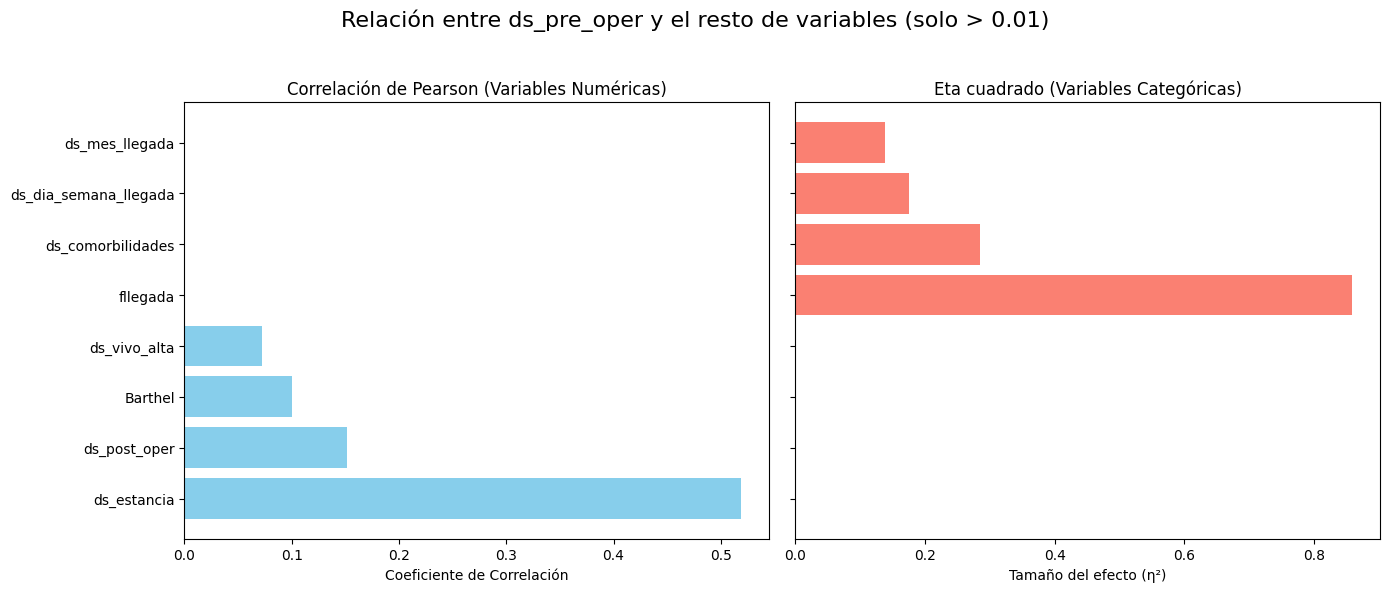

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Cargar el DataFrame (asegúrate de que la ruta es correcta)
#df = pd.read_csv('DATOS_PREPROCESADOS_3.csv')

# Convertir ds_pre_oper a numérico (en caso de que no lo sea)
df['ds_pre_oper'] = pd.to_numeric(df['ds_pre_oper'], errors='coerce')

# Separamos las variables numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'ds_pre_oper' in num_cols:
    num_cols.remove('ds_pre_oper')

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Calcular la correlación de Pearson para las variables numéricas respecto a ds_pre_oper
num_corr = {}
for col in num_cols:
    if not df[col].dropna().empty:
        corr, p_value = ss.pearsonr(df[col].dropna(), df['ds_pre_oper'].dropna())
        num_corr[col] = corr

# Calcular el tamaño del efecto (eta cuadrado) para las variables categóricas
# eta² = (F * df_between) / (F * df_between + df_within)
cat_effect = {}
for col in cat_cols:
    groups = [group['ds_pre_oper'].dropna() for _, group in df.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = ss.f_oneway(*groups)
        k = len(groups)
        df_between = k - 1
        df_within = df['ds_pre_oper'].dropna().shape[0] - k
        eta_sq = (f_stat * df_between) / (f_stat * df_between + df_within)
        cat_effect[col] = eta_sq
    else:
        cat_effect[col] = np.nan

# Convertir resultados a DataFrames para facilitar el plot
num_df = pd.DataFrame(list(num_corr.items()), columns=['Variable', 'Measure'])
num_df['Tipo'] = 'Numérica'

cat_df = pd.DataFrame(list(cat_effect.items()), columns=['Variable', 'Measure'])
cat_df['Tipo'] = 'Categórica'

# Filtrar solo aquellas variables con medida mayor a 0.01:
num_df = num_df[num_df['Measure'].abs() > 0.07]
cat_df = cat_df[cat_df['Measure'] > 0.07]

# Ordenar cada DataFrame por la magnitud de la medida
num_df = num_df.sort_values(by='Measure', key=lambda x: abs(x), ascending=False)
cat_df = cat_df.sort_values(by='Measure', ascending=False)

# Crear el gráfico resumen con dos paneles (subplots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Panel para variables numéricas (Pearson)
axes[0].barh(num_df['Variable'], abs(num_df['Measure']), color='skyblue')
axes[0].set_title("Correlación de Pearson (Variables Numéricas)")
axes[0].set_xlabel("Coeficiente de Correlación")
axes[0].invert_yaxis()  # La variable con mayor correlación aparece arriba

# Panel para variables categóricas (Eta cuadrado)
axes[1].barh(cat_df['Variable'], cat_df['Measure'], color='salmon')
axes[1].set_title("Eta cuadrado (Variables Categóricas)")
axes[1].set_xlabel("Tamaño del efecto (η²)")
axes[1].invert_yaxis()

plt.suptitle("Relación entre ds_pre_oper y el resto de variables (solo > 0.01)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/tmp/ipykernel_1973/977672321.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['ds_post_oper'].dropna() for _, group in df.groupby(col)]


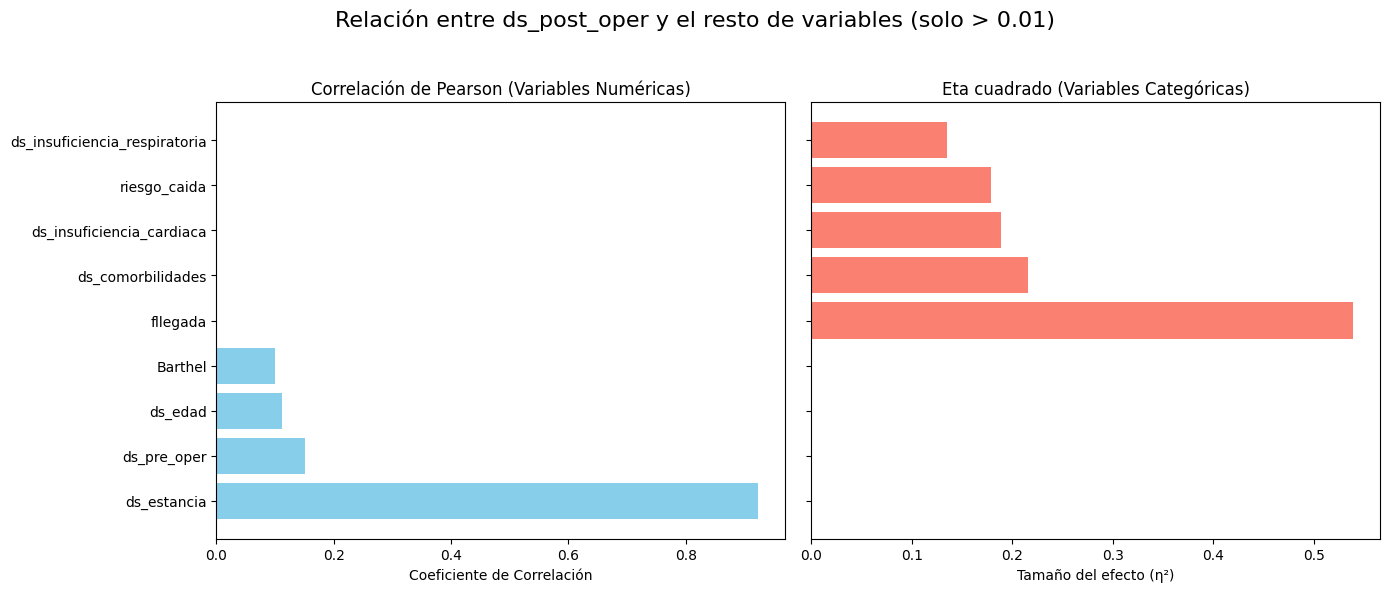

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Cargar el DataFrame (asegúrate de que la ruta es correcta)
#df = pd.read_csv('DATOS_PREPROCESADOS_3.csv')

# Convertir ds_post_oper a numérico (en caso de que no lo sea)
df['ds_post_oper'] = pd.to_numeric(df['ds_post_oper'], errors='coerce')

# Separamos las variables numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'ds_post_oper' in num_cols:
    num_cols.remove('ds_post_oper')

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Calcular la correlación de Pearson para las variables numéricas respecto a ds_post_oper
num_corr = {}
for col in num_cols:
    if not df[col].dropna().empty:
        corr, p_value = ss.pearsonr(df[col].dropna(), df['ds_post_oper'].dropna())
        num_corr[col] = corr

# Calcular el tamaño del efecto (eta cuadrado) para las variables categóricas
# eta² = (F * df_between) / (F * df_between + df_within)
cat_effect = {}
for col in cat_cols:
    groups = [group['ds_post_oper'].dropna() for _, group in df.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = ss.f_oneway(*groups)
        k = len(groups)
        df_between = k - 1
        df_within = df['ds_post_oper'].dropna().shape[0] - k
        eta_sq = (f_stat * df_between) / (f_stat * df_between + df_within)
        cat_effect[col] = eta_sq
    else:
        cat_effect[col] = np.nan

# Convertir resultados a DataFrames para facilitar el plot
num_df = pd.DataFrame(list(num_corr.items()), columns=['Variable', 'Measure'])
num_df['Tipo'] = 'Numérica'

cat_df = pd.DataFrame(list(cat_effect.items()), columns=['Variable', 'Measure'])
cat_df['Tipo'] = 'Categórica'

# Filtrar solo aquellas variables con medida mayor a 0.01:
num_df = num_df[num_df['Measure'].abs() > 0.09]
cat_df = cat_df[cat_df['Measure'] > 0.09]

# Ordenar cada DataFrame por la magnitud de la medida
num_df = num_df.sort_values(by='Measure', key=lambda x: abs(x), ascending=False)
cat_df = cat_df.sort_values(by='Measure', ascending=False)

# Crear el gráfico resumen con dos paneles (subplots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Panel para variables numéricas (Pearson)
axes[0].barh(num_df['Variable'], abs(num_df['Measure']), color='skyblue')
axes[0].set_title("Correlación de Pearson (Variables Numéricas)")
axes[0].set_xlabel("Coeficiente de Correlación")
axes[0].invert_yaxis()  # La variable con mayor correlación aparece arriba

# Panel para variables categóricas (Eta cuadrado)
axes[1].barh(cat_df['Variable'], cat_df['Measure'], color='salmon')
axes[1].set_title("Eta cuadrado (Variables Categóricas)")
axes[1].set_xlabel("Tamaño del efecto (η²)")
axes[1].invert_yaxis()

plt.suptitle("Relación entre ds_post_oper y el resto de variables (solo > 0.01)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/tmp/ipykernel_1973/1154155785.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['gsitalta'].dropna() for _, group in df.groupby(col)]


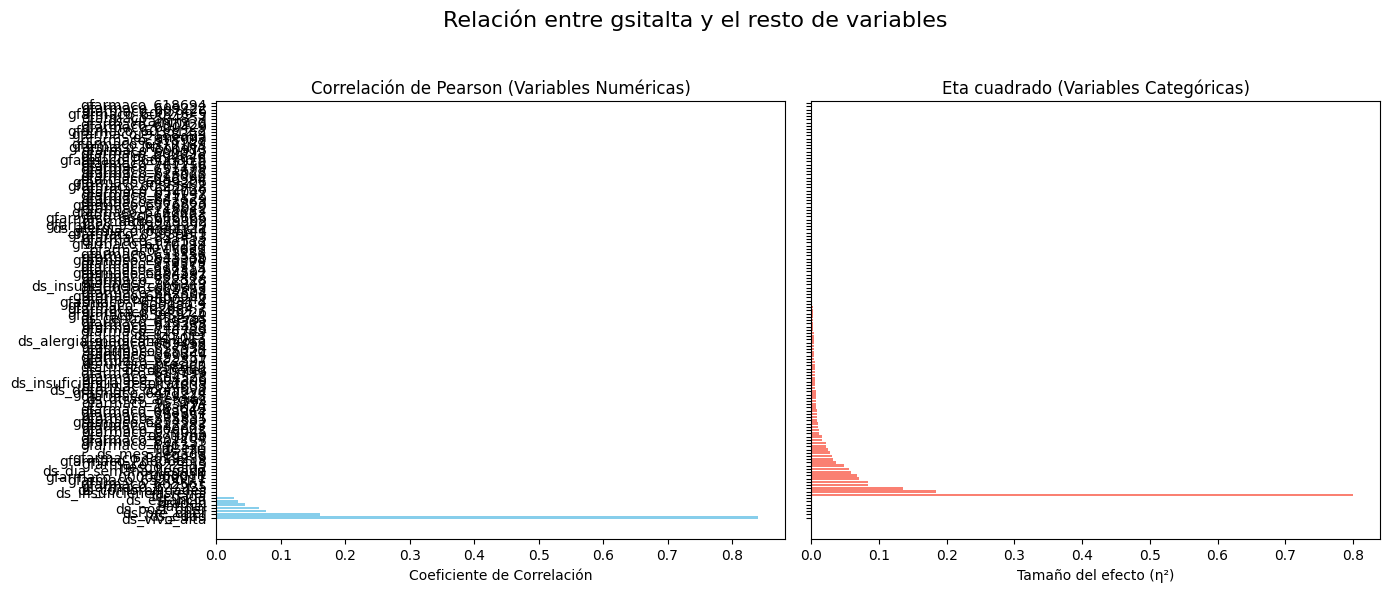

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Asegúrate de cargar el DataFrame, por ejemplo:
# df = pd.read_csv('DATOS_PREPROCESADOS_3.csv')

# Convertir gsitalta a numérico (en caso de que no lo sea)
df['gsitalta'] = pd.to_numeric(df['gsitalta'], errors='coerce')

# Separamos las variables numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'gsitalta' in num_cols:
    num_cols.remove('gsitalta')

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Calcular la correlación de Pearson para las variables numéricas
num_corr = {}
for col in num_cols:
    if not df[col].dropna().empty:
        corr, p_value = ss.pearsonr(df[col].dropna(), df['gsitalta'].dropna())
        num_corr[col] = corr

# Calcular el tamaño del efecto (eta cuadrado) para las variables categóricas
# eta² = (F * df_between) / (F * df_between + df_within)
cat_effect = {}
for col in cat_cols:
    groups = [group['gsitalta'].dropna() for _, group in df.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = ss.f_oneway(*groups)
        k = len(groups)
        df_between = k - 1
        df_within = df['gsitalta'].dropna().shape[0] - k
        eta_sq = (f_stat * df_between) / (f_stat * df_between + df_within)
        cat_effect[col] = eta_sq
    else:
        cat_effect[col] = np.nan

# Convertir resultados a DataFrames para facilitar el plot
num_df = pd.DataFrame(list(num_corr.items()), columns=['Variable', 'Measure'])
num_df['Tipo'] = 'Numérica'

cat_df = pd.DataFrame(list(cat_effect.items()), columns=['Variable', 'Measure'])
cat_df['Tipo'] = 'Categórica'

# Ordenar cada DataFrame por la magnitud de la medida
num_df = num_df.sort_values(by='Measure', key=lambda x: abs(x), ascending=False)
cat_df = cat_df.sort_values(by='Measure', ascending=False)

# Crear el gráfico resumen con dos paneles (subplots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Panel para variables numéricas (Pearson)
axes[0].barh(num_df['Variable'], abs(num_df['Measure']), color='skyblue')
axes[0].set_title("Correlación de Pearson (Variables Numéricas)")
axes[0].set_xlabel("Coeficiente de Correlación")
axes[0].invert_yaxis()  # Para que la variable con mayor correlación aparezca arriba

# Panel para variables categóricas (Eta cuadrado)
axes[1].barh(cat_df['Variable'], cat_df['Measure'], color='salmon')
axes[1].set_title("Eta cuadrado (Variables Categóricas)")
axes[1].set_xlabel("Tamaño del efecto (η²)")
axes[1].invert_yaxis()

plt.suptitle("Relación entre gsitalta y el resto de variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/tmp/ipykernel_1973/1756345414.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['gsitalta'].dropna() for _, group in df.groupby(col)]


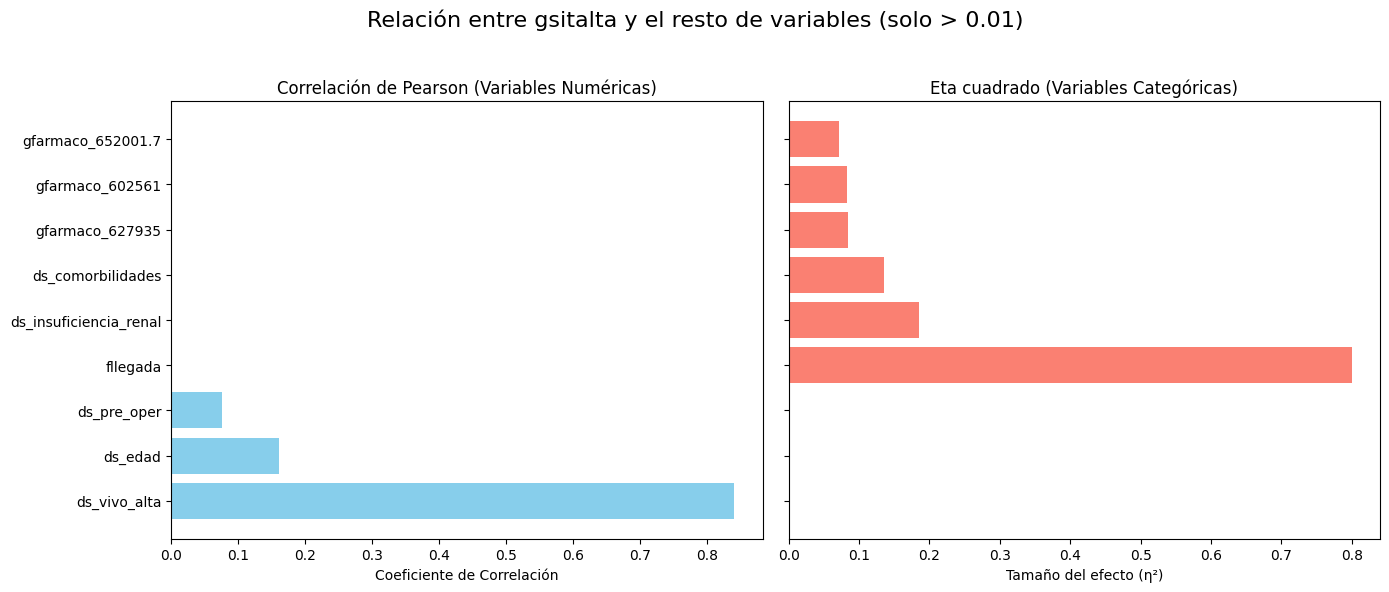

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Cargar el DataFrame (asegúrate de que la ruta es correcta)
#df = pd.read_csv('DATOS_PREPROCESADOS_3.csv')

# Convertir gsitalta a numérico (en caso de que no lo sea)
df['gsitalta'] = pd.to_numeric(df['gsitalta'], errors='coerce')

# Separamos las variables numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'gsitalta' in num_cols:
    num_cols.remove('gsitalta')

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Calcular la correlación de Pearson para las variables numéricas respecto a gsitalta
num_corr = {}
for col in num_cols:
    if not df[col].dropna().empty:
        corr, p_value = ss.pearsonr(df[col].dropna(), df['gsitalta'].dropna())
        num_corr[col] = corr

# Calcular el tamaño del efecto (eta cuadrado) para las variables categóricas
# eta² = (F * df_between) / (F * df_between + df_within)
cat_effect = {}
for col in cat_cols:
    groups = [group['gsitalta'].dropna() for _, group in df.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = ss.f_oneway(*groups)
        k = len(groups)
        df_between = k - 1
        df_within = df['gsitalta'].dropna().shape[0] - k
        eta_sq = (f_stat * df_between) / (f_stat * df_between + df_within)
        cat_effect[col] = eta_sq
    else:
        cat_effect[col] = np.nan

# Convertir resultados a DataFrames para facilitar el plot
num_df = pd.DataFrame(list(num_corr.items()), columns=['Variable', 'Measure'])
num_df['Tipo'] = 'Numérica'

cat_df = pd.DataFrame(list(cat_effect.items()), columns=['Variable', 'Measure'])
cat_df['Tipo'] = 'Categórica'

# Filtrar solo aquellas variables con medida mayor a 0.01:
num_df = num_df[num_df['Measure'].abs() > 0.07]
cat_df = cat_df[cat_df['Measure'] > 0.07]

# Ordenar cada DataFrame por la magnitud de la medida
num_df = num_df.sort_values(by='Measure', key=lambda x: abs(x), ascending=False)
cat_df = cat_df.sort_values(by='Measure', ascending=False)

# Crear el gráfico resumen con dos paneles (subplots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Panel para variables numéricas (Pearson)
axes[0].barh(num_df['Variable'], abs(num_df['Measure']), color='skyblue')
axes[0].set_title("Correlación de Pearson (Variables Numéricas)")
axes[0].set_xlabel("Coeficiente de Correlación")
axes[0].invert_yaxis()  # Para que la variable con mayor correlación aparezca arriba

# Panel para variables categóricas (Eta cuadrado)
axes[1].barh(cat_df['Variable'], cat_df['Measure'], color='salmon')
axes[1].set_title("Eta cuadrado (Variables Categóricas)")
axes[1].set_xlabel("Tamaño del efecto (η²)")
axes[1].invert_yaxis()

plt.suptitle("Relación entre gsitalta y el resto de variables (solo > 0.01)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
